In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 1. Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [17]:
# Step 2. Preprocessing – scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Step 3. Feature selection – manually choose features
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']  
X_selected = X[selected_features]
print("Manually selected features:\n", selected_features)

Manually selected features:
 ['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']


In [9]:
# Step 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 5. Train regression models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
# Step 6. Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Step 7. Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nLinear Regression: MSE =", round(mse_lr, 3), "| R² =", round(r2_lr, 3))
print("Random Forest:     MSE =", round(mse_rf, 3), "| R² =", round(r2_rf, 3))



Linear Regression: MSE = 0.549 | R² = 0.581
Random Forest:     MSE = 0.251 | R² = 0.809


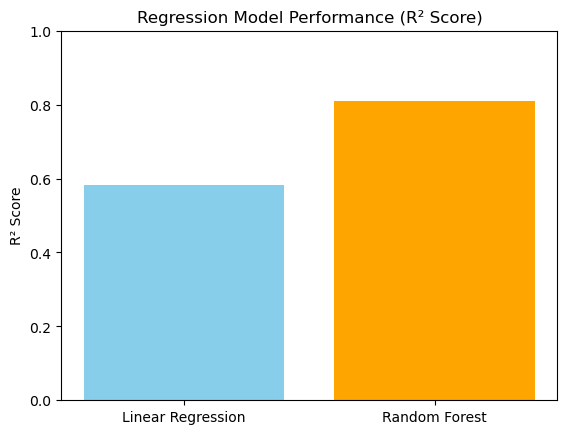

In [13]:
# Step 8. Simple comparison plot
models = ['Linear Regression', 'Random Forest']
r2_scores = [r2_lr, r2_rf]

plt.bar(models, r2_scores, color=['skyblue', 'orange'])
plt.title("Regression Model Performance (R² Score)")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()